In [27]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#from wordcloud import WordCloud
# import seaborn as sns

In [28]:

df = pd.read_csv("clean_data_analyst.csv")

In [29]:
df.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,SalaryEstimate_low,SalaryEstimate_high,Revenue_low,Revenue_high
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1,TRUE,New York,NY,37000.0,66000.0,100000000.0,500000000.0
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1,-1,New York,NY,37000.0,66000.0,2000000.0,5000000.0
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,GoDaddy,-1,New York,NY,37000.0,66000.0,NaN,NaN


In [30]:
df = df.rename(columns={'Job Title': 'Title'})

In [31]:
df.head(2)

,Unnamed: 0,Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,SalaryEstimate_low,SalaryEstimate_high,Revenue_low,Revenue_high
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1,TRUE,New York,NY,37000.0,66000.0,100000000.0,500000000.0
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1,-1,New York,NY,37000.0,66000.0,2000000.0,5000000.0


In [32]:
df['Location'].value_counts()

New York, NY            310
Chicago, IL             130
San Francisco, CA       119
Austin, TX               81
Los Angeles, CA          80
                       ... 
Berkeley Heights, NJ      1
Coppell, TX               1
Duarte, CA                1
Riverton, UT              1
West Jordan, UT           1
Name: Location, Length: 253, dtype: int64

In [33]:
df['Easy Apply'].value_counts()

-1      2173
TRUE      80
Name: Easy Apply, dtype: int64

In [34]:
# Easy apply option is not available for most of the companies. It seems like it is an unnecessary column.

In [35]:
df['Competitors'].value_counts()

-1                                          1732
Adecco, Manpower                              14
Robert Half, Insight Global                   14
TEKsystems, Insight Global, Accenture         10
Google, Microsoft, Samsung Electronics        10
                                            ... 
Aerotek, WinterWyman, Hollister Staffing       1
Netflix, Amazon, Apple                         1
Adobe, Akamai, Oracle                          1
eHealth, Anthem                                1
Robert Half, Kforce                            1
Name: Competitors, Length: 291, dtype: int64

In [36]:
df.columns

Index(['Unnamed: 0', 'Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Competitors', 'Easy Apply', 'City', 'State',
       'SalaryEstimate_low', 'SalaryEstimate_high', 'Revenue_low',
       'Revenue_high'],
      dtype='object')

In [37]:
for col in df:
    df[col]= df[col].replace('-1', np.nan)
    df[col]= df[col].replace(-1, np.nan)

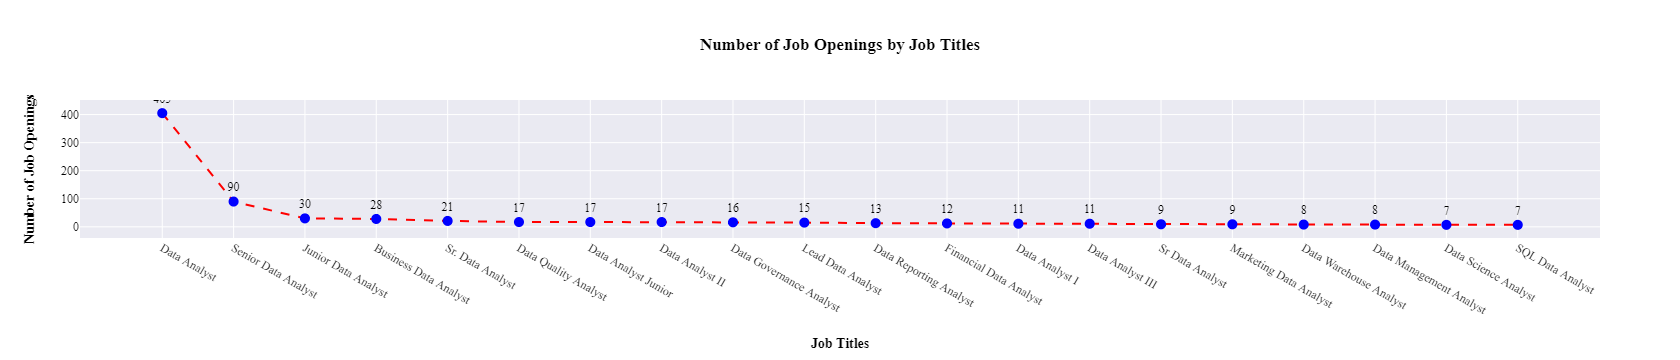

In [38]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x= df["Title"].value_counts()[:20].index,
    y= df['Title'].value_counts()[:20].values,
    name='Number of Job Openings',
    mode='markers+text+lines',
    marker_color='blue',
    marker_size=10,
    text=df['Title'].value_counts()[:20].values,
    textposition='top center',
    line=dict(color='red',dash='dash'),
))
fig.update_layout(
    title= "<b>Number of Job Openings by Job Titles</b>",
    xaxis_title="<b>Job Titles</b>",
    yaxis_title="<b>Number of Job Openings</b>",
    template='seaborn',
    font=dict(
        size=12,
        color="Black",
        family="Oswald', sans-serif"
        ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    yaxis2=dict(showgrid=True,overlaying='y',side='right',title='<b>Number of Job Openings</b>'),
    legend=dict(yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.78)
)
fig.show()
fig.write_html("no_jobs.html")


In [39]:
df['SalaryEstimate_ave']=(df['SalaryEstimate_low']+df['SalaryEstimate_high'])/2

In [40]:
df['Revenue_ave']=(df['Revenue_low']+df['Revenue_high'])/2

In [41]:
df['Comp_Age'] = 2020 - df['Founded']

In [42]:
df["Comp_Age"].unique()

array([ 59., 127.,  17.,  18.,  11.,   6.,  19., 106., 124.,   7., 179.,
        nan, 136.,  16.,   4.,  24.,  62.,  14.,  22.,  51.,   9.,   3.,
        15., 116.,   2.,  64.,  13.,  30.,  97.,   5.,  69.,  39.,  20.,
        54.,  81.,  21., 208.,  75.,  35.,  36.,  58.,  25.,   8.,  53.,
       221., 102.,  72.,  26., 125., 175.,  52.,  12., 109.,  23., 188.,
        86.,  82.,  57.,  28.,  43., 134., 158., 114.,  27.,  85.,  49.,
        31., 161.,  74., 202.,  88., 236., 164.,  42., 108.,  63.,  83.,
        38.,  56., 170.,  37., 151.,  73., 152.,  84., 167.,  10., 118.,
        76., 132., 140.,  47.,  89.,  33.,   1., 101.,  41.,  66.,  40.,
        44., 148.,  94.,  29., 165.,  61.,  34., 130., 138., 137., 183.,
       203., 112.,  32.,  55., 192., 131., 122.,  92., 107., 119., 104.,
       163.,  65.,  71.,  50., 198.,  48., 156.,  45.,  60., 135.,  98.,
       280., 190., 133.,  46., 115.,  67.,  68., 123., 155.,  99., 153.,
        87., 146., 129., 213., 150., 128., 168., 32

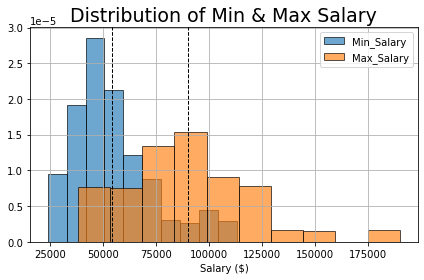

In [43]:
# Salary Histogram

df['SalaryEstimate_low'].hist(density=1, label = "Min_Salary", edgecolor='k', alpha=0.65)
df['SalaryEstimate_high'].hist(density=1, label = "Max_Salary", edgecolor='k', alpha=0.65)

plt.xlabel("Salary ($)")
plt.legend({'Min_Salary':df['SalaryEstimate_low'],'Max_Salary':df['SalaryEstimate_high']})
plt.title("Distribution of Min & Max Salary",fontsize=19)

plt.axvline(df['SalaryEstimate_low'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['SalaryEstimate_high'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.savefig("salaryhist.png")
plt.show()


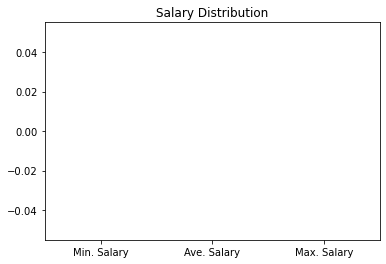

In [44]:

plt.boxplot([df['SalaryEstimate_low'],df['SalaryEstimate_ave'],df['SalaryEstimate_high']], labels=['Min. Salary', 'Ave. Salary', 'Max. Salary'])

plt.title('Salary Distribution')
plt.savefig("salarybox.png")
plt.show()


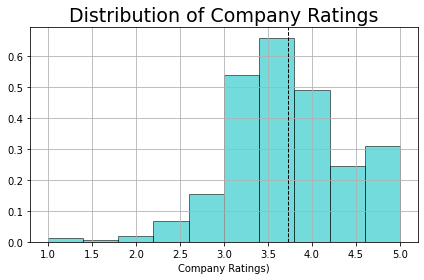

In [45]:
# Company Ratings Histogram

df['Rating'].hist(density=1, label = "Min_Salary",color='c', edgecolor='k', alpha=0.55)

plt.xlabel("Company Ratings)")
plt.title("Distribution of Company Ratings",fontsize=19)

plt.axvline(df['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("rating.png")
plt.show()


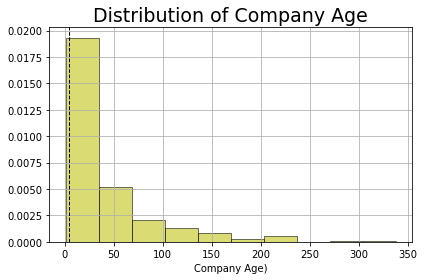

In [46]:
# Company Age Histogram

df['Comp_Age'].hist(density=1, label = "Min_Salary",color='y', edgecolor='k', alpha=0.55)

plt.xlabel("Company Age)")
plt.title("Distribution of Company Age",fontsize=19)

plt.axvline(df['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("age.png")
plt.show()




In [47]:
# Job Locations vs Hiring

Location_count = df.groupby('Location')[['Title']].count().reset_index().sort_values(
    'Title', ascending=False).reset_index(drop=True)

In [48]:
Location_count

,Location,Title
0,"New York, NY",310
1,"Chicago, IL",130
2,"San Francisco, CA",119
3,"Austin, TX",81
4,"Los Angeles, CA",80
...,...,...
248,"Henderson, CO",1
249,"Harrison, NY",1
250,"Hanford, CA",1
251,"Great Neck, NY",1


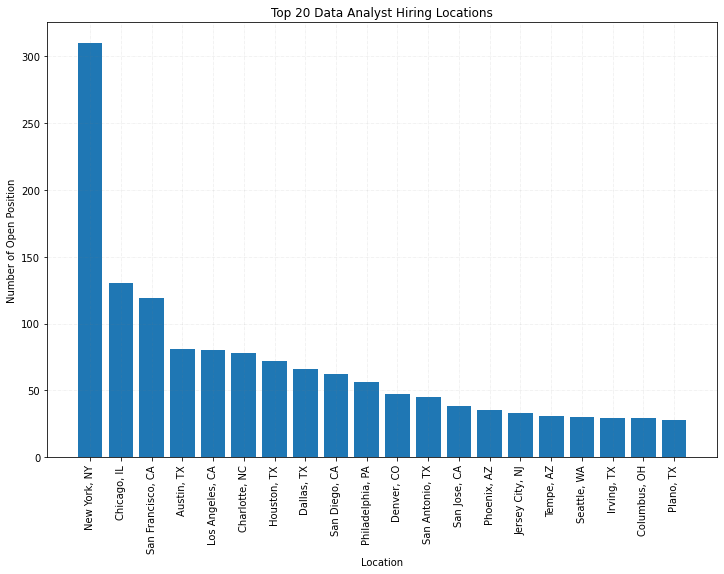

In [49]:
x = Location_count['Location'].head(20)
y = Location_count['Title'].head(20)
fig, ax = plt.subplots(figsize =(12, 8))   
ax.bar(x, y) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xticks(rotation=90)
plt.xlabel("Location") 
plt.ylabel("Number of Open Position") 
plt.title("Top 20 Data Analyst Hiring Locations") 
plt.show() 
fig.savefig('hiring.png', dpi=fig.dpi)

In [50]:
df=df.groupby('Location')[['SalaryEstimate_high','SalaryEstimate_low']].mean().sort_values(['SalaryEstimate_high','SalaryEstimate_low'],ascending=False).head(20)

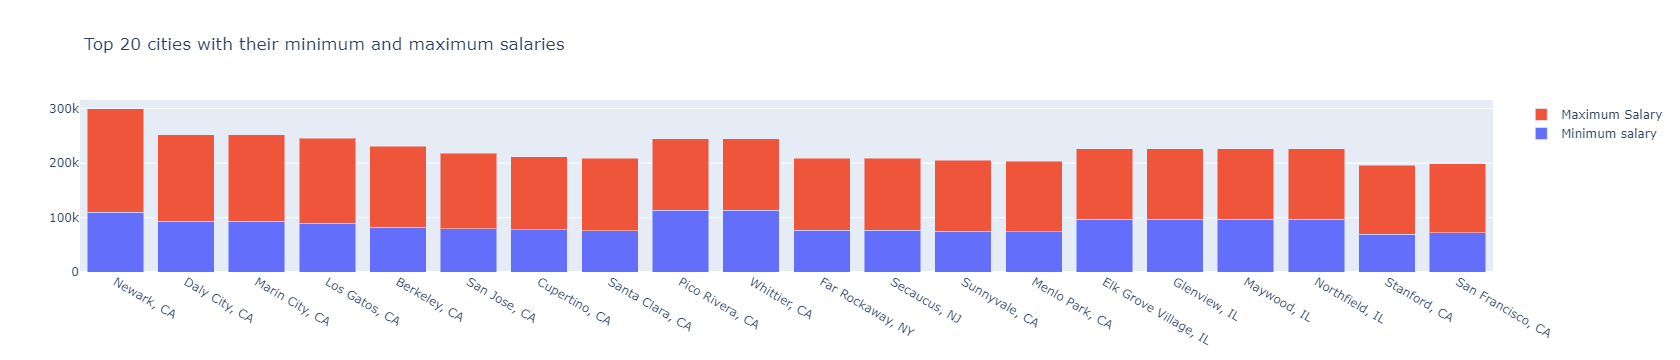

<Figure size 432x288 with 0 Axes>

In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['SalaryEstimate_low'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['SalaryEstimate_high'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()
plt.savefig("max_min_salary.png")
fig.write_html("max_min.html")

In [52]:
df.head()

,SalaryEstimate_high,SalaryEstimate_low
Location,,
"Newark, CA",190000.0,110000.000000
"Daly City, CA",159000.0,93000.000000
"Marin City, CA",159000.0,93000.000000
"Los Gatos, CA",156000.0,89333.333333
"Berkeley, CA",149000.0,82000.000000
